## Table of Contents
1. [Problem Statement](#1.-Problem-Statement)  
2. [Importing Libraries and Data](#2.-Importing-Libraries-and-Data)   
3. [Data Cleaning](#3.-Data-Cleaning)  
4. [Pre-Processing](#4.-Pre-Processing)  
5. [EDA](#5.-EDA)  
6. [Feature Engineering](#6.-Feature-Engineering)  
7. [Modeling](#7.-Modeling)  
8. [Model Evaluation](#8.-Model-Evaluation)  
9. [Recommendations and Conclusion](#9.-Recommendations-and-Conclusion)  
10. [Future Steps](#10.-Future-Steps)

# 1. Problem Statement
[Return to top](#Table-of-Contents)

# 2. Importing Libraries and Data
[Return to top](#Table-of-Contents)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)

In [20]:
spray = pd.read_csv('../data/spray.csv')
test = pd.read_csv('../data/test.csv')
train = pd.read_csv('../data/train.csv')
weather = pd.read_csv('../data/weather.csv')
sample = pd.read_csv('../data/sampleSubmission.csv')

In [21]:
def data_reading(df):
    print(df.shape)
    print(f'\ndtypes:')
    print(f'\n{df.dtypes}')
    print(f'\nisnull()')
    print(f'\n{df.isnull().sum()}')
    return(df.head())

In [22]:
data_reading(spray)

(14835, 4)

dtypes:

Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object

isnull()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64


,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


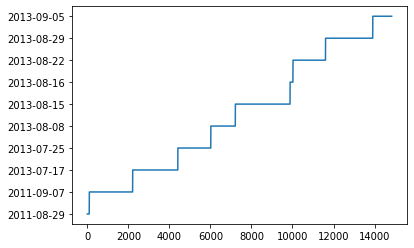

In [23]:
plt.plot(spray['Date'])

In [24]:
data_reading(test)

(116293, 11)

dtypes:

Id                          int64
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
dtype: object

isnull()

Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64


,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [25]:
data_reading(train)

(10506, 12)

dtypes:

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

isnull()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [26]:
data_reading(weather)

(2944, 22)

dtypes:

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

isnull()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [27]:
data_reading(sample) 

## remember to reset_index() before submission

(116293, 2)

dtypes:

Id            int64
WnvPresent    int64
dtype: object

isnull()

Id            0
WnvPresent    0
dtype: int64


,Id,WnvPresent
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


# 3. Data Cleaning
[Return to top](#Table-of-Contents)

### Train & Test data cleaning

In [28]:
train.head(3) 

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0


Since Latitude & Longitude are given, the following items are  deemed redundant. 
- Address
- Block
- Street
- AddressNumberAndStreet
- AddressAccuracy

In [29]:
train.drop(columns = ['Address', 'Block', 'Street','AddressNumberAndStreet','AddressAccuracy'], inplace=True)

In [31]:
train['Date'] = pd.to_datetime(train['Date'])

duplicate_list = ['Date','Trap','Species','Latitude','Longitude','WnvPresent']

train = pd.DataFrame(train.groupby(by= duplicate_list, axis=0).sum()) 
# adding the duplicate rows which are >50, but columns become index

train.reset_index(inplace=True) # reset all columns out from being index

train.head()

,Date,Trap,Species,Latitude,Longitude,WnvPresent,NumMosquitos
0,2007-05-29,T002,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,0,1
1,2007-05-29,T002,CULEX RESTUANS,41.954690,-87.800991,0,1
2,2007-05-29,T007,CULEX RESTUANS,41.994991,-87.769279,0,1
3,2007-05-29,T015,CULEX PIPIENS/RESTUANS,41.974089,-87.824812,0,1
4,2007-05-29,T015,CULEX RESTUANS,41.974089,-87.824812,0,4


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8610 entries, 0 to 8609
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8610 non-null   datetime64[ns]
 1   Trap          8610 non-null   object        
 2   Species       8610 non-null   object        
 3   Latitude      8610 non-null   float64       
 4   Longitude     8610 non-null   float64       
 5   WnvPresent    8610 non-null   int64         
 6   NumMosquitos  8610 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 471.0+ KB


In [33]:
train.WnvPresent.value_counts(normalize=True) # 94.7% of the data consists of WnvPresent == 0

0    0.946922
1    0.053078
Name: WnvPresent, dtype: float64

<AxesSubplot:xlabel='WnvPresent', ylabel='count'>

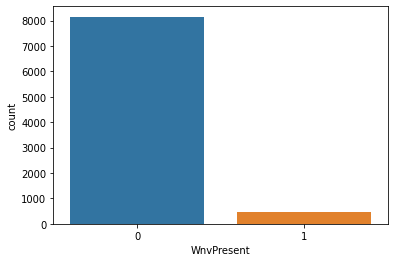

In [34]:
sns.countplot(data=train, x=train.WnvPresent)

**Comment**  
94.7% of the data consists of WnvPresent == 0   
The data is severely imbalanced. Consider imbalanced data manipulation such as under-sampling the majority class, or over-sampling the minority class.

Since the presense of West Nile Virus is our primary concern, WnvPresent == 1 shall be the positive class.  
Hence, we will be over-sampling the minority class in this project.  

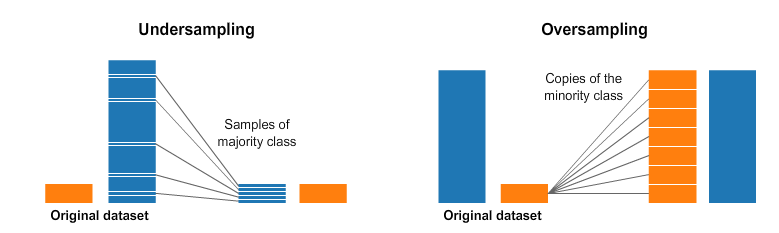

Applying inappropriate evaluation metrics for model generated using imbalanced data can be dangerous. If accuracy is used to measure the goodness of a model, a model which classifies all testing samples into “0” will have an excellent accuracy (99.8%), but obviously this model won’t provide any valuable information for us.

In this case, other alternative evaluation metrics can be applied such as:

- Precision/Specificity: how many selected instances are relevant.  
- Recall/Sensitivity: how many relevant instances are selected.  
- F1 score: harmonic mean of precision and recall.  
- MCC: correlation coefficient between the observed and predicted binary classifications.  
- AUC: relation between true-positive rate and false positive rate.  

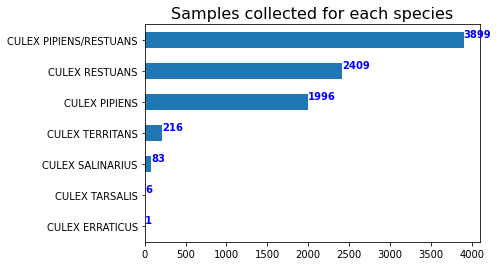

In [35]:
# visualize samples colelcted for each species 
fig, ax = plt.subplots()
train['Species'].value_counts(ascending=True).plot(kind='barh')
for i, v in enumerate(train['Species'].value_counts(ascending=True)):
    ax.text(v + 3, i + 0.1, str(v), color='blue', fontweight='bold')
plt.title('Samples collected for each species', fontsize=16);

In [64]:
wnv1_list = list(train[train['WnvPresent'] == 1]['Species'].unique())
wnv1_list

['CULEX PIPIENS/RESTUANS', 'CULEX PIPIENS', 'CULEX RESTUANS']

In [171]:
list(train['Species'].unique())

['CULEX PIPIENS/RESTUANS',
 'CULEX RESTUANS',
 'CULEX PIPIENS',
 'CULEX SALINARIUS',
 'CULEX TERRITANS',
 'CULEX TARSALIS',
 'CULEX ERRATICUS']

In [170]:
wnv00 = list(set(train['Species'].unique()) - set(wnv1_list))
wnv00

['CULEX SALINARIUS', 'CULEX TARSALIS', 'CULEX ERRATICUS', 'CULEX TERRITANS']

# !!!HERE!!!

# WEST NILE VIRUS MUST BE POSITIVE CLASS
# OVER SAMPLE THE DATA, TRY SMOTE

In [37]:
# Insert new column in train dataset for Year

train['Year'] = train['Date'].dt.year

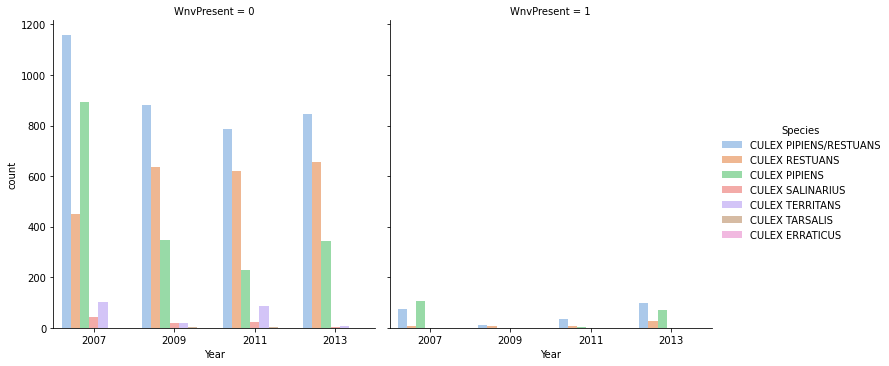

In [53]:
sns.catplot(data=train, 
           x='Year',
           hue='Species',
           col='WnvPresent',
           kind='count', palette='pastel')


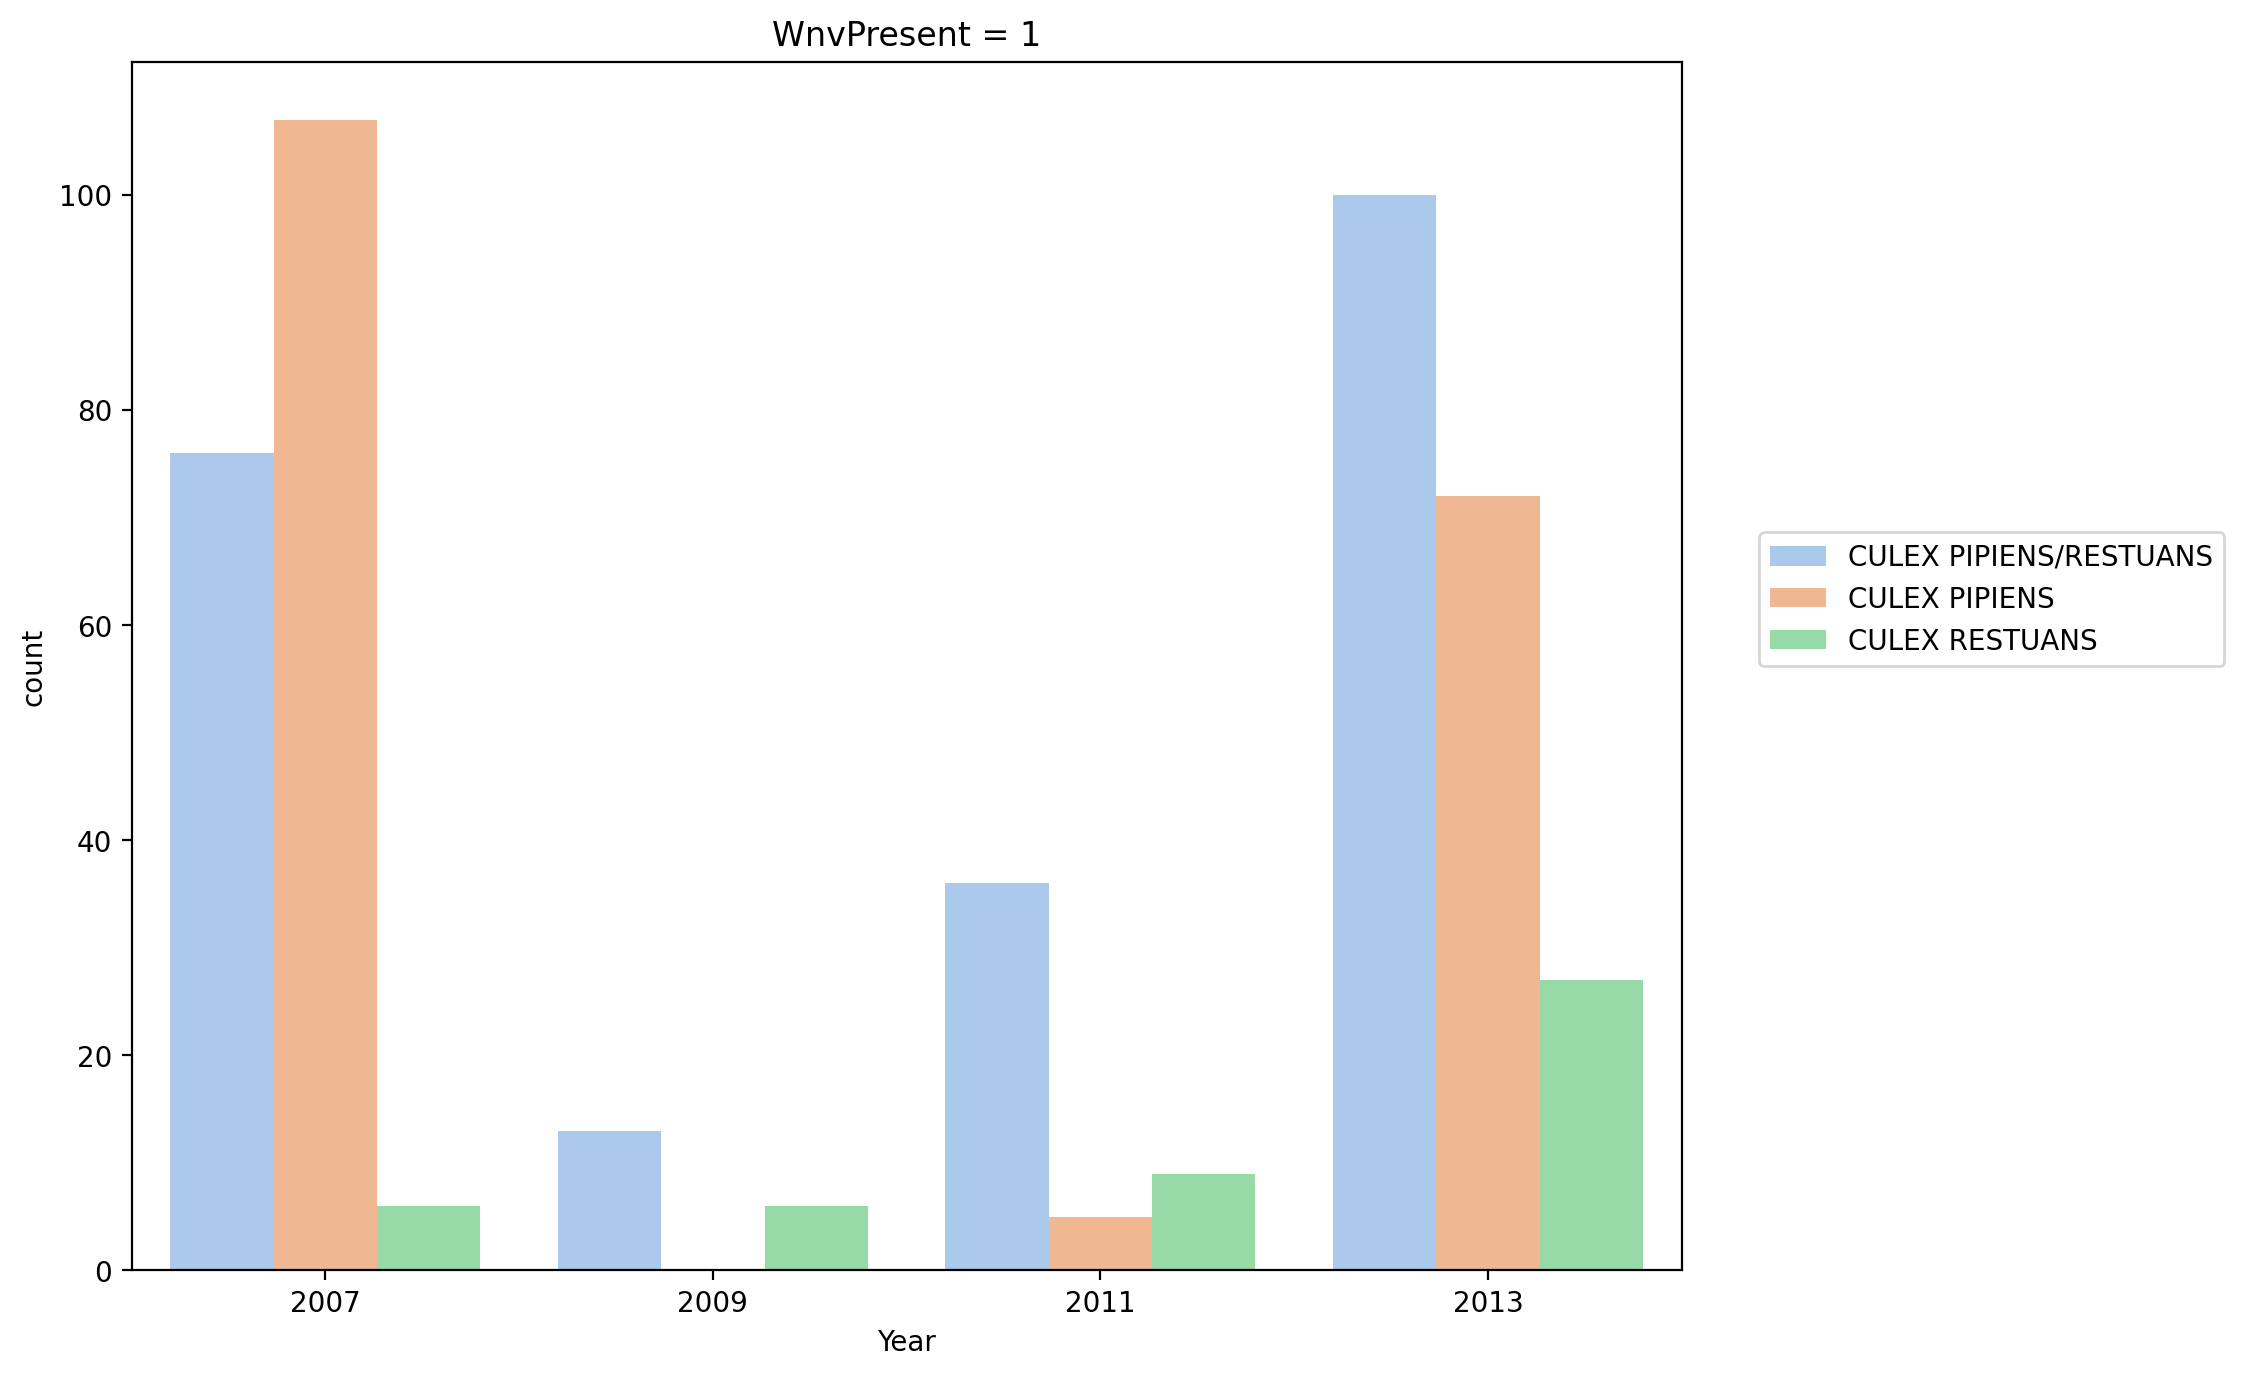

In [51]:
# Further analyse the distribution of WNV positive samples over the years

plt.figure(figsize=(10,8),dpi=200)
sns.countplot(data=train[train['WnvPresent']==1], x='Year',hue='Species',palette='pastel')
plt.legend(loc=(1.05,0.5))
plt.title('WnvPresent = 1')
plt.show();

In [58]:
spray['Date'].unique()

array(['2011-08-29', '2011-09-07', '2013-07-17', '2013-07-25',
       '2013-08-08', '2013-08-15', '2013-08-16', '2013-08-22',
       '2013-08-29', '2013-09-05'], dtype=object)

In [64]:
train['Date'].count().unique()

AttributeError: 'numpy.int32' object has no attribute 'unique'

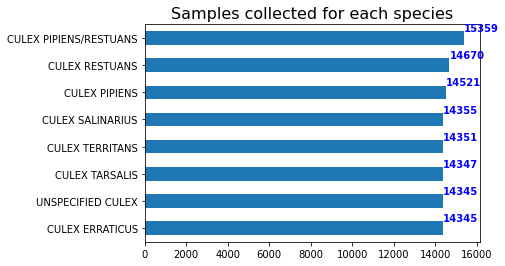

In [30]:
fig, ax = plt.subplots()
test['Species'].value_counts(ascending=True).plot(kind='barh')
for i, v in enumerate(test['Species'].value_counts(ascending=True)):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.title('Samples collected for each species', fontsize=16);

In [8]:
train_test_diff=[] # identify the difference between train & test columns
train_test_diff.extend(list(set(test.columns).difference(set(train.columns)))) #prepare to drop 'Id' in test set
train_test_diff.extend(list(set(train.columns).difference(set(test.columns)))) #prepare to add 'WnvPresent', 'NumMosquitos' to test set
train_test_diff

['Id', 'NumMosquitos', 'WnvPresent']

In [10]:
print(f'test: {list(test.columns)}')
print()
print(f'train: {list(train.columns)}')
print()
print(f'difference: {train_test_diff}')

test: ['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy']

train: ['Date', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent']

difference: ['Id', 'NumMosquitos', 'WnvPresent']


In [11]:
test = test.set_index('Id',drop=True)
test.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
Id,,,,,,,,,,
1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


# 4. Pre-Processing
[Return to top](#Table-of-Contents)

# 5. EDA
[Return to top](#Table-of-Contents)

# 6. Feature Engineering
[Return to top](#Table-of-Contents)

# 7. Modeling
[Return to top](#Table-of-Contents)

# 8. Model Evaluation  
[Return to top](#Table-of-Contents)

# 9. Recommendations and Conclusion  
[Return to top](#Table-of-Contents)

# 10. Future Steps
[Return to top](#Table-of-Contents)